In [26]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import postpic as pp
import math
import sdf
pp.datareader.chooseCode('epoch')

Populating the interactive namespace from numpy and matplotlib


/home/smy/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
filename='/home/smy/Documents/epoch-4.8.3./epoch1d/test_left/20010.sdf'
dr = pp.readDump(filename)
print(dr.keys())

['Header', 'Electric Field/Ex', 'Electric Field/Ey', 'Electric Field/Ez', 'Magnetic Field/By', 'Magnetic Field/Bz', 'Current/Jx', 'Current/Jy', 'Derived/Number_Density', 'Derived/Number_Density/electron1', 'Derived/Jx/electron1', 'Derived/Jy/electron1', 'Grid/Grid', 'Grid/Grid_mid', 'CPUs/Original rank', 'CPUs/Current rank']


In [37]:
### for scan ###
the_number_of_files = 20
################

### for movie ###
file_start = 0
file_finish = 1000
################

### for common ##
x_min = 0                   # size of domain in Lambda
x_max = 36                  
order_start = 50
order_finish =100
Lambda=800*1e-9
c=3*1e8

point_of_lambda = 800

normalized_electric_factor = 2.485e-13
normalized_density_factor = 1.74e27

Ts=Lambda/c  # 激光周期m/s

w0=(2*pi)/Ts  # laser angle frequency

grid = dr['Grid/Grid']

grid_size_x = np.size(grid.data)-1       #total length

dt = (grid.data[0][1]-grid.data[0][0])/c   #采样时间

fs = 1/dt                        # 采样频率 Hz

w1=fs*2*pi                       #采样角频率 

x_axis = linspace(x_min, x_max, grid_size_x)
freq_axis_shift = linspace(0,1,grid_size_x,endpoint=False)*fs*(2*pi)/w0-fs*(2*pi)/w0/2
freq_axis = linspace(0,1,grid_size_x,endpoint=False)*fs*(2*pi)/w0

# initial Laser + target

Text(0,0.5,'Intensity')

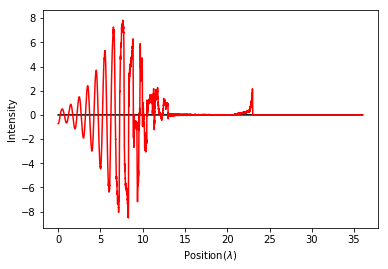

In [38]:
#### electric field ####
ey = dr['Electric Field/Ey']
ey_normalize = ey.data*normalized_electric_factor

#### target density ####
ne = dr['Derived/Number_Density/electron1'].data
ne_normalize = ne/normalized_density_factor

plot(x_axis,ne_normalize,'-k')
plot(x_axis,ey_normalize,'-r')
xlabel('Position$(\lambda)$')
ylabel('Intensity')

#xlim([18,19])
#ylim([-0.1,.1])

# spectral domain

/home/smy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-3, 3)

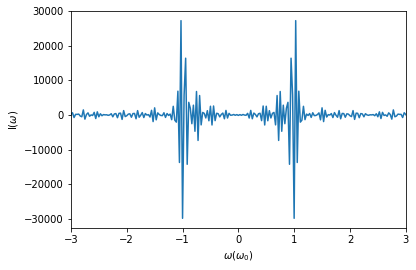

In [80]:
#spectral domain
FFT_ey = fft.fft(ey_normalize)
plot(freq_axis_shift,fftshift(FFT_ey))

xlabel('$\omega(\omega_0)$')
ylabel('I($\omega)$')
xlim(-3,3)

Text(0,0.5,'I($\\omega)$')

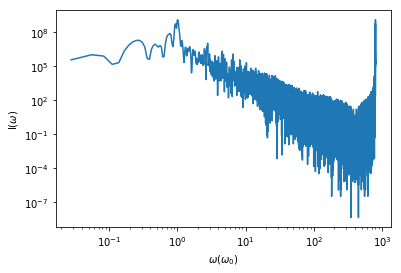

In [43]:
plot(freq_axis,abs(FFT_ey)**2)
yscale('log')
xscale('log')

xlabel('$\omega(\omega_0)$')
ylabel('I($\omega)$')
#xlim(1,2)

# Filter

/home/smy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


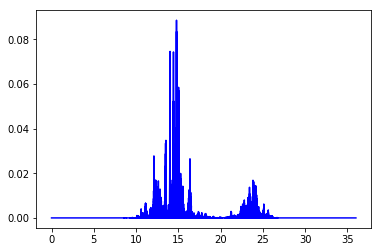

In [13]:
#### filter ####
start = int(order_start*(size(FFT_ey)/point_of_lambda))
finish = int(order_finish*(size(FFT_ey)/point_of_lambda))

window = zeros(size(FFT_ey))

window[start:finish] = 1
window[int(size(FFT_ey)-finish):int(size(FFT_ey)-start)] = 1
    
#### after window ####
IFFT_ey = np.multiply(window,FFT_ey)

#### inverse FFT ####
After_filter_ey= ifft(IFFT_ey)**2

#### plot ####
plot(x_axis,After_filter_ey,'-b')

#xlim(3,5)